In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("1645792390_cep1_dataset.xlsx")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().any()

True

In [8]:
df=df.drop_duplicates(keep="first").reset_index(drop=True)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
cat_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
con_var = ["age", "trestbps", "chol", "thalach", "oldpeak"]

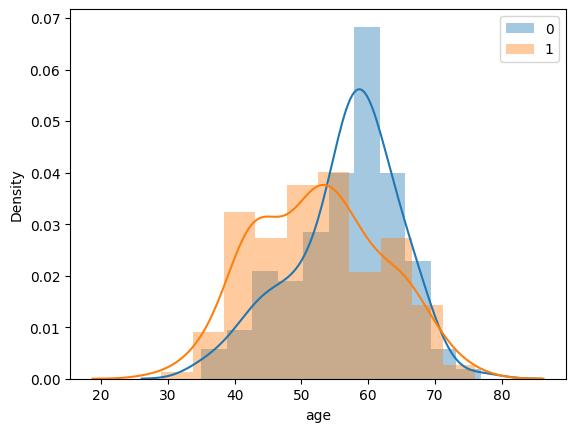

In [12]:
sns.distplot(df[df["target"]==0]["age"], label=0)
sns.distplot(df[df["target"]==1]["age"], label=1)
plt.legend()

age columns is seems normal distributed

In [13]:
pd.crosstab(df["fbs"], df.target)

target,0,1
fbs,,
0,116,141
1,22,23


as we can see that we have 55 peoples is having fasting blood sugar level more than 120 mg/dl, which is a sign of prediabetes and out of which 23 peoples is having the cardivascular disease which is around 50%. it can be a significant feature, we'll find it later by the hypothesis testing.

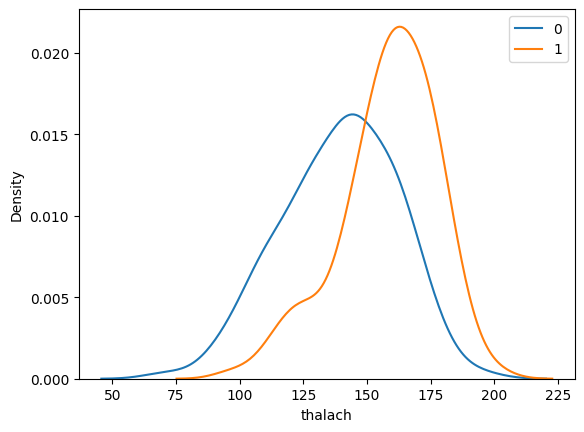

In [14]:
sns.distplot(df[df["target"]==0]["thalach"], hist=False, label=0)
sns.distplot(df[df["target"]==1]["thalach"], hist=False, label=1)
plt.legend()

according to above graph the thalach featue is pretty normal distributed where target=0 but we can see that the graph is little bit of left skewed where target =1

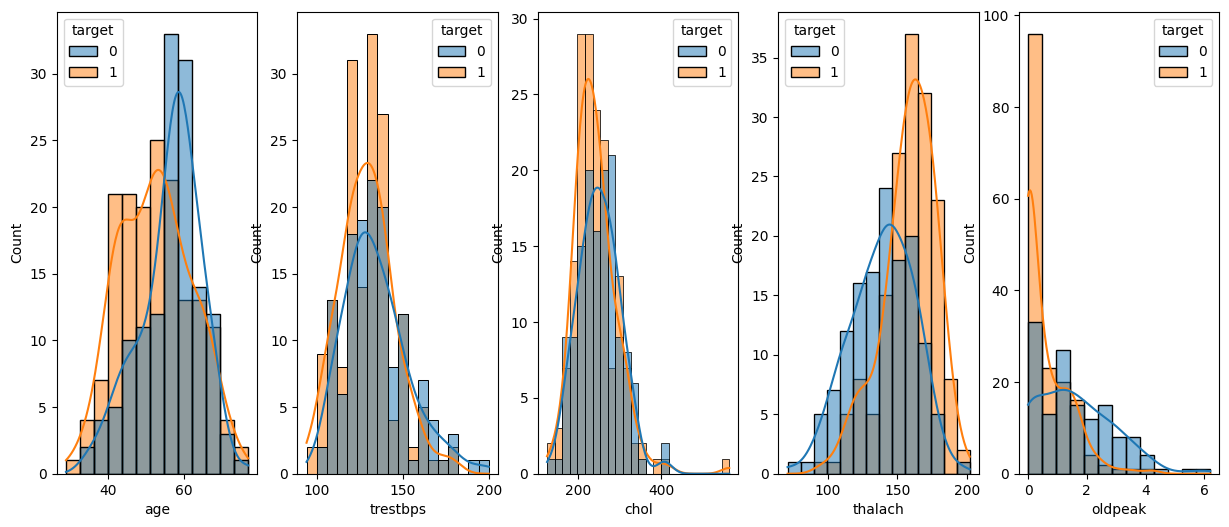

In [15]:
fig, ax = plt.subplots(nrows=1 , ncols=len(con_var), figsize=(15,6))
for i, col in enumerate(con_var):
    sns.histplot(x=df[col],ax=ax[i], hue=df.target, kde=True)

all of the distribution looks seems to normal distribution, some of them is having outliers too.

In [16]:
 desc = df.describe()
for col in con_var:
        q1, q3 = desc.loc[['25%', '75%'], col]
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f'{col}: {len(outliers)} outliers detected')


age: 0 outliers detected
trestbps: 9 outliers detected
chol: 5 outliers detected
thalach: 1 outliers detected
oldpeak: 5 outliers detected


as we have the less number of points so we not gonnna remove these outliers, instead of this we,ll cap them

In [17]:
df["trestbps"]=np.where(df["trestbps"]>np.quantile(df["trestbps"], 0.75), np.quantile(df["trestbps"], 0.75),
        np.where(df["trestbps"]<np.quantile(df["trestbps"], 0.25), np.quantile(df["trestbps"], 0.25),
        df["trestbps"]))

In [18]:
df["chol"]=np.where(df["chol"]>np.quantile(df["chol"], 0.75), np.quantile(df["chol"], 0.75),
        np.where(df["chol"]<np.quantile(df["chol"], 0.25), np.quantile(df["chol"], 0.25),
        df["chol"]))

In [19]:
df["thalach"]=np.where(df["thalach"]>np.quantile(df["thalach"], 0.75), np.quantile(df["thalach"], 0.75),
        np.where(df["thalach"]<np.quantile(df["thalach"], 0.25), np.quantile(df["thalach"], 0.25),
        df["thalach"]))

In [20]:
df["oldpeak"]=np.where(df["oldpeak"]>np.quantile(df["oldpeak"], 0.75), np.quantile(df["oldpeak"], 0.75),
        np.where(df["oldpeak"]<np.quantile(df["oldpeak"], 0.25), np.quantile(df["oldpeak"], 0.25),
        df["oldpeak"]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


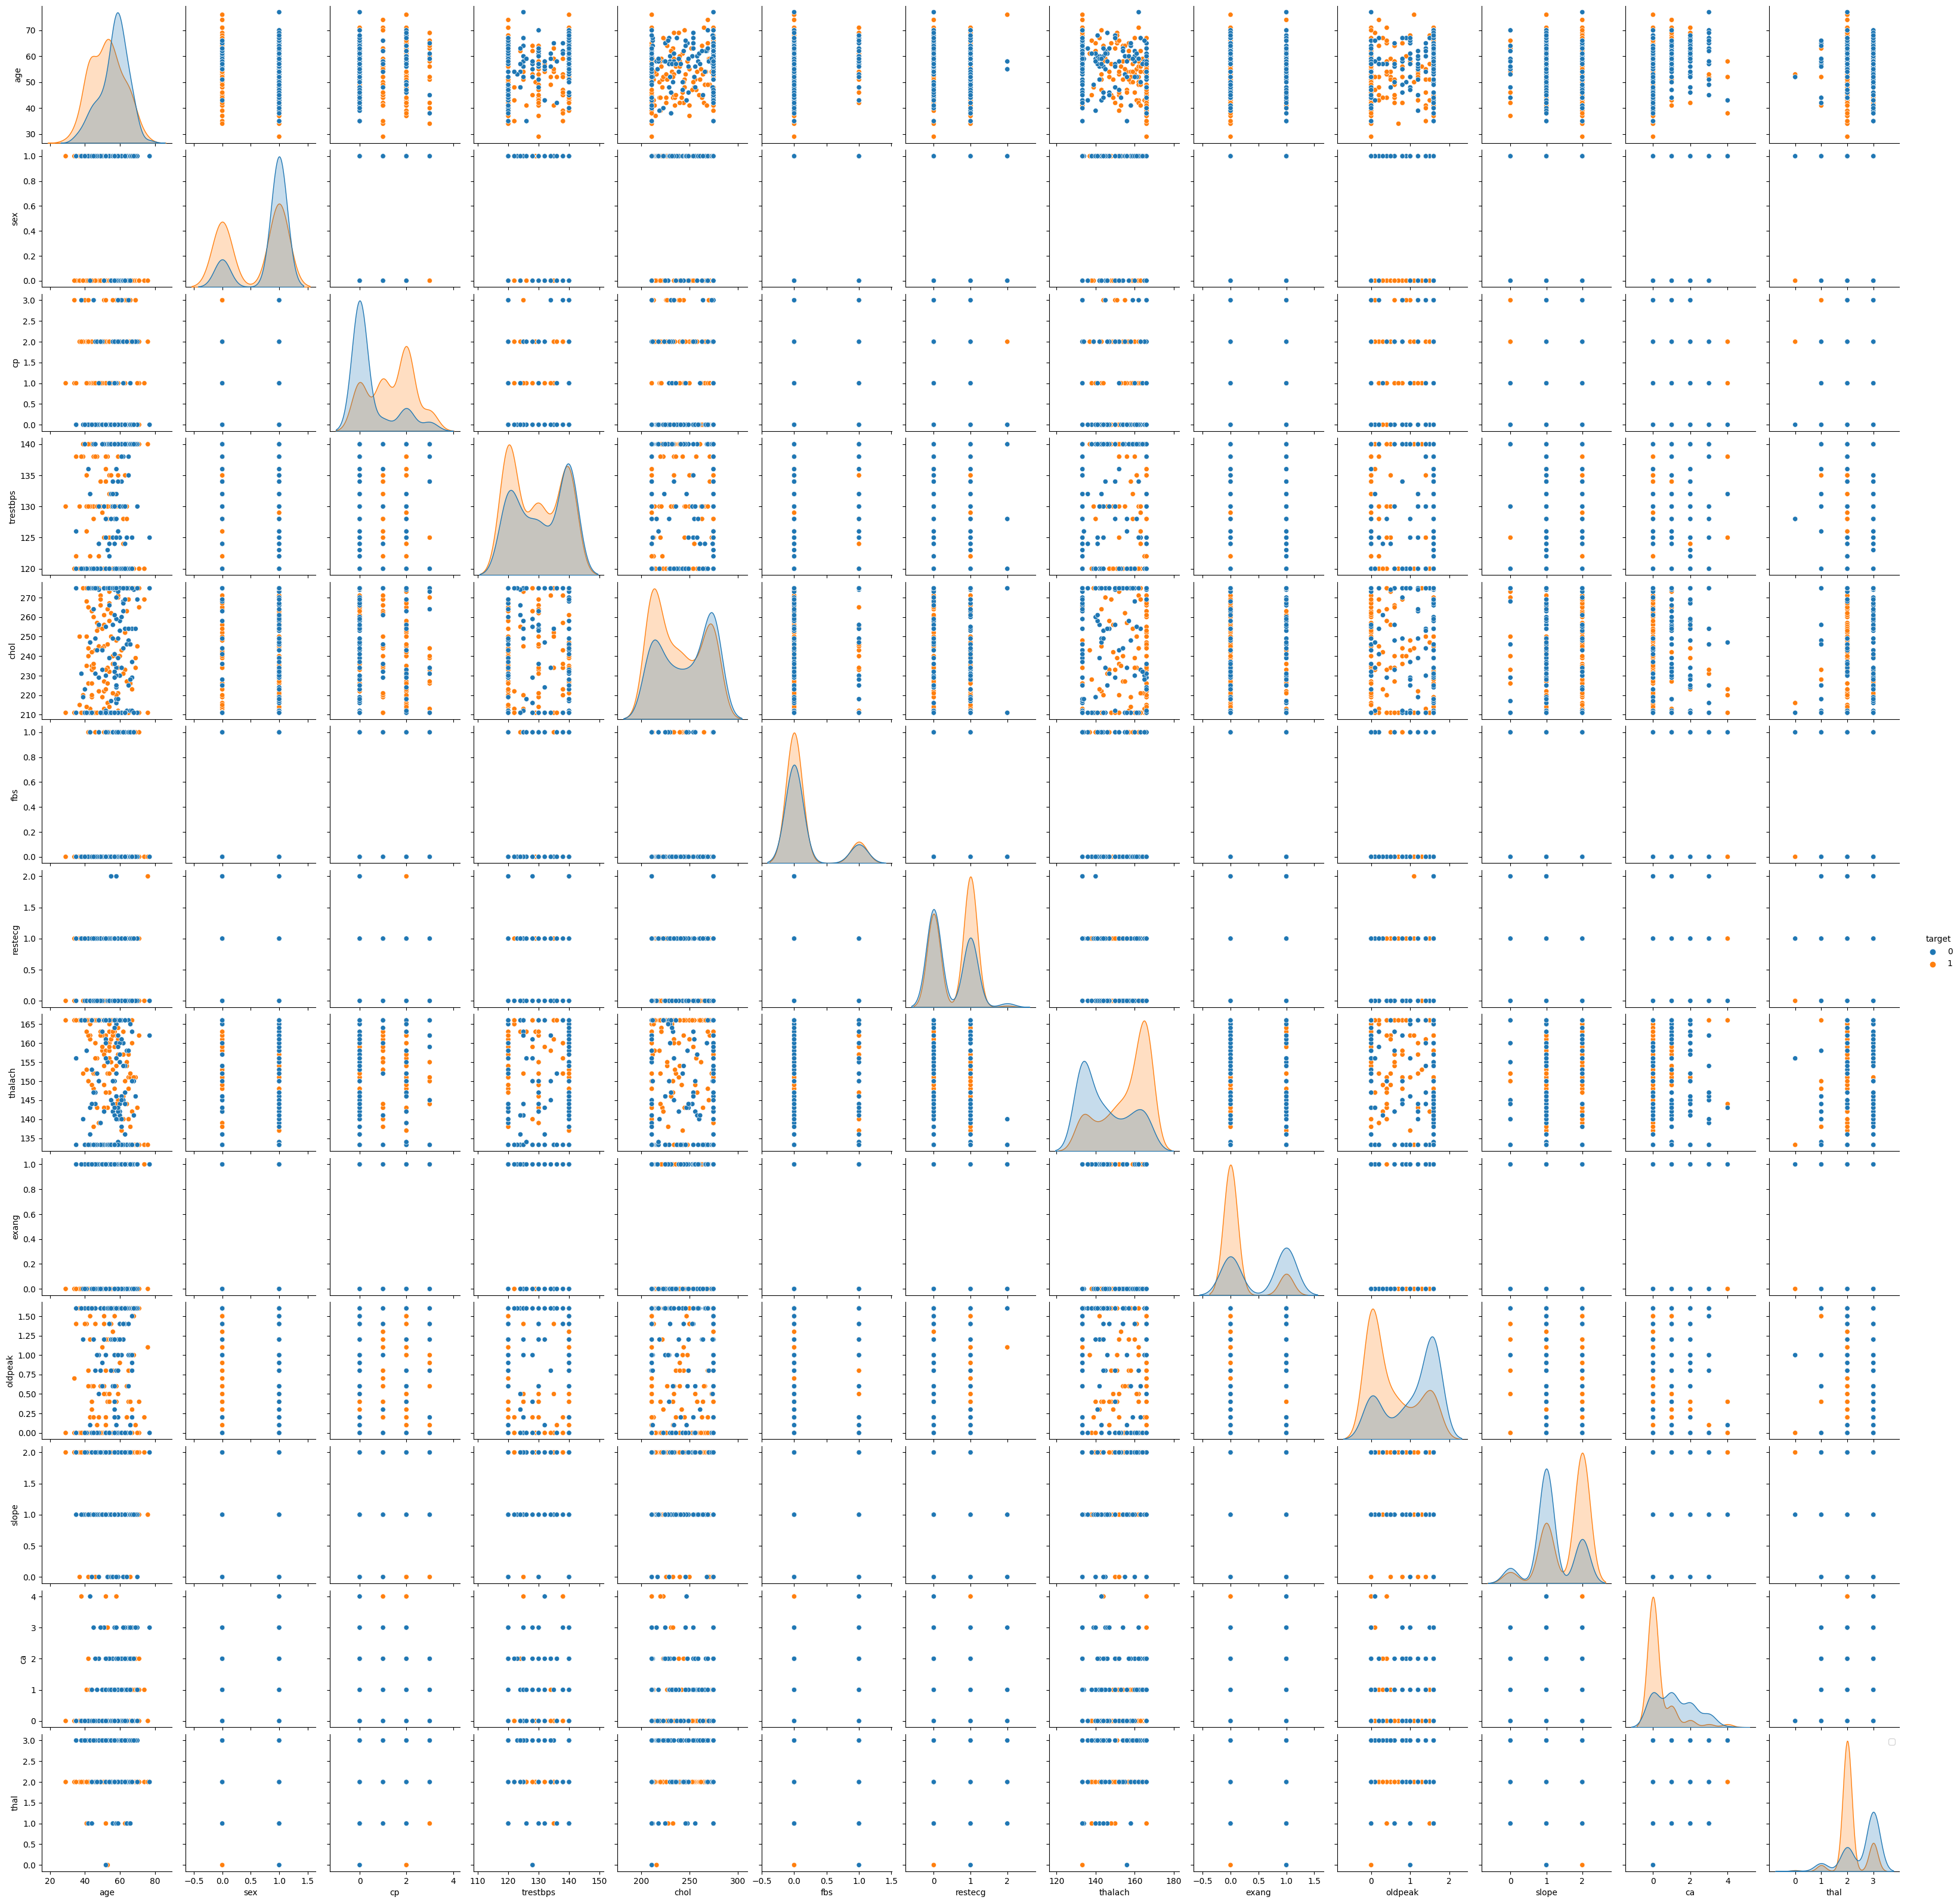

In [76]:
sns.pairplot(df, hue="target")
plt.legend()

<AxesSubplot: xlabel='sex'>

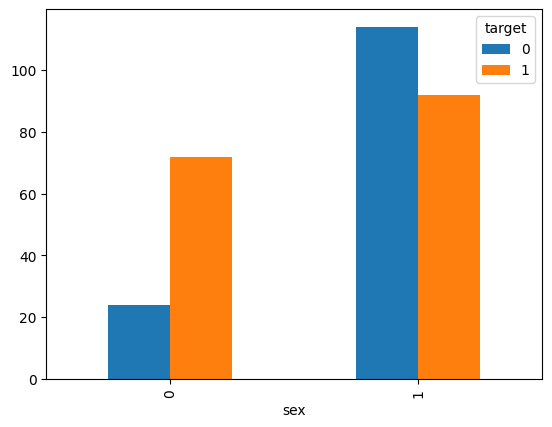

In [21]:
pd.crosstab(df["sex"], df.target).plot.bar()

In [22]:
df["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [23]:
bins=[0,10, 20, 30, 40, 50,60, 70,80,90]
df["age_bins"] = pd.cut(df["age"], bins)

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,1,3,140.0,233.00,1,0,150.0,0,1.6,0,0,1,1,"(60, 70]"
1,37,1,2,130.0,250.00,0,1,166.0,0,1.6,0,0,2,1,"(30, 40]"
2,41,0,1,130.0,211.00,0,0,166.0,0,1.4,2,0,2,1,"(40, 50]"
3,56,1,1,120.0,236.00,0,1,166.0,0,0.8,2,0,2,1,"(50, 60]"
4,57,0,0,120.0,274.75,0,1,163.0,1,0.6,2,0,2,1,"(50, 60]"


In [25]:
pd.DataFrame(df.groupby(["age_bins", "sex"])["target"].value_counts()).rename(columns={"target" : "counts"})

counts
age_bins sex target        
(20, 30] 1   1            1
(30, 40] 0   1            5
         1   0            6
             1            6
(40, 50] 0   1           21
             0            1
         1   1           32
             0           22
(50, 60] 0   1           24
             0           11
         1   0           54
             1           40
(60, 70] 0   1           17
             0           12
         1   0           31
             1           13
(70, 80] 0   1            5
         1   0            1

<AxesSubplot: xlabel='age_bins,sex,target'>

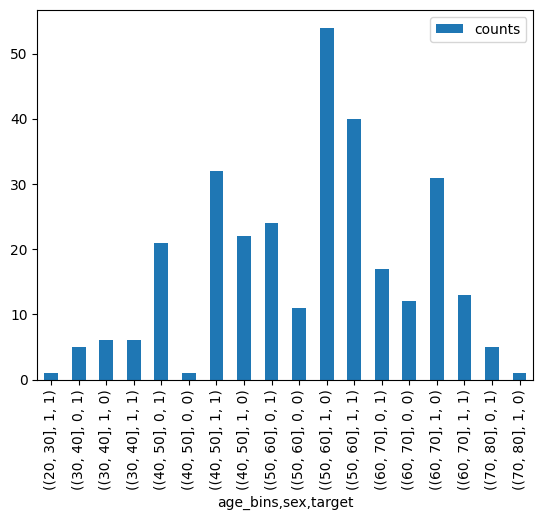

In [26]:
pd.DataFrame(df.groupby(["age_bins", "sex"])["target"].value_counts()).rename(columns={"target" : "counts"}).plot(kind="bar")

<AxesSubplot: xlabel='chol', ylabel='Density'>

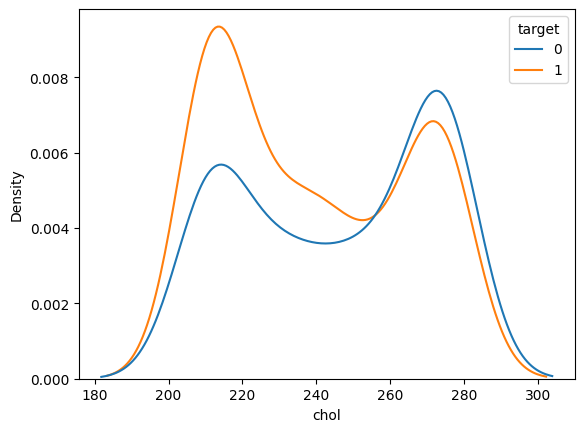

In [44]:
sns.kdeplot(x=df["chol"], hue=df.target,)

<AxesSubplot: xlabel='slope', ylabel='Density'>

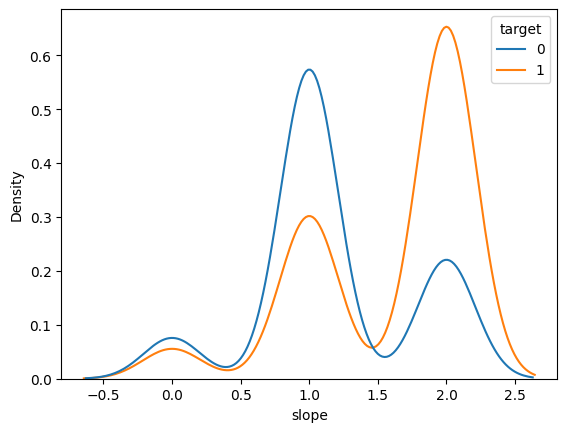

In [47]:
sns.kdeplot(x=df["slope"], hue=df.target)

Slope impacts a lot. as we can see As the slope is increasing, the number of sick people is increasing.

<AxesSubplot: xlabel='thal', ylabel='count'>

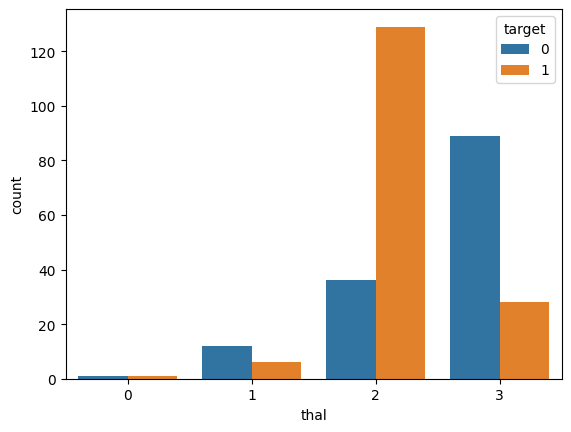

In [49]:
sns.countplot(x=df["thal"], hue=df.target)

## MODEL

In [53]:
# Feature Selection of categorical variables

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

X = df[cat_var]
y=df.target

In [117]:
test, p_value = chi2(X, y)

In [118]:
p_value = pd.Series(p_value)
p_value.index = X_train.columns
p_value>0.05

sex        False
cp         False
fbs         True
restecg     True
exang      False
slope      False
ca         False
thal       False
dtype: bool

only fbs, restecg feature is important

In [119]:
from scipy.stats import pointbiserialr
# Compute point-biserial correlation coefficient

for col in con_var:
    corr_coeff, p_value = pointbiserialr(target, df[col])

    # Evaluate the results
    if p_value < 0.05:
        if corr_coeff < 0:
            print('There is a significant negative correlation between the variables {}.'.format(col))
        else:
            print('There is a significant positive correlation between the variables {}.'.format(col))
    else:
        print('There is no significant correlation between the variables {}.'.format(col))


There is a significant negative correlation between the variables age.
There is no significant correlation between the variables trestbps.
There is a significant negative correlation between the variables chol.
There is a significant positive correlation between the variables thalach.
There is a significant negative correlation between the variables oldpeak.


#### Columns to keep
- age
- chol
- thalach
- oldpeak
- restecg
- fbs

In [121]:
X=df[["age", "chol", "thalach", "oldpeak", "restecg", "fbs"]]
y=df.target

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [124]:
lr=LogisticRegression()
rf=RandomForestClassifier()

In [125]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
yhat_lr = lr.predict(X_test)
yhat_rf = rf.predict(X_test)

In [127]:
print("Accuracy score of Logistice Regression :", accuracy_score(y_test, yhat_lr))
print("Accuracy score of RanformForestClassifier :", accuracy_score(y_test, yhat_rf))


Accuracy score of Logistice Regression : 0.7362637362637363
Accuracy score of RanformForestClassifier : 0.6813186813186813


In [136]:
print("Classification Report of Logistice Regression :\n", classification_report(y_test, yhat_lr))
print("Confusion Matrix of Logistice Regression :\n", confusion_matrix(y_test, yhat_lr))

print("---------------------------------------------------------------------------------------------")

print("Classification Report of RanformForestClassifier :\n", classification_report(y_test, yhat_rf))
print("Confusion Matrix of RandomforestClassifier :\n", confusion_matrix(y_test, yhat_rf))


Classification Report of Logistice Regression :
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        42
           1       0.74      0.80      0.76        49

    accuracy                           0.74        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.74      0.74      0.73        91

Confusion Matrix of Logistice Regression :
 [[28 14]
 [10 39]]
---------------------------------------------------------------------------------------------
Classification Report of RanformForestClassifier :
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        42
           1       0.69      0.73      0.71        49

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.68      0.68      0.68        91

Confusion Matrix of RandomforestClassifier :
 [[26 16]
 [13 36]]


- Logistic Regression is working Good.